# Inverse kinematics with the Ergo Junior #

In this notebook, we will discover the Inverse Kinematics functionnalities of Pypot + IKPy with an Ergo Jr.
You can see this notebook as the starting point to discover Inverse Kinematics, used with a real (or simulated) robot!

# Requirements

For this tutorial, you will need :
* IKPy installed : installations instructions
* The Ergo Jr creature installed : installation instructions
* An actual ErgoJr **or** use the VREP simulator (no hardware required + VREP has a free version)
  + Build an ErgoJr
  + Install VRep

# Setting things up

Some imports first.

In [1]:
import matplotlib.pyplot
%matplotlib notebook

First, instantiate your Creature

In [2]:
from poppy.creatures import PoppyErgoJr


poppy = PoppyErgoJr(simulator='vrep')

# Forward Kinematics #

With Forward Kinematics, you can access the 3D position of your robot, from the angles of the motors : 
![FK](fk.png)

For the Ergo Jr, you will get the 3D position of the tip (the blue dot on the picture above): 
![FK-Ergo](FK Ergo Jr.png)

To access the Forwards Kinematics of the Ergo Jr : 

In [3]:
poppy.chain.end_effector

array([-0.00670386, -0.17439168,  0.15083097])

# Plotting

<IPython.core.display.Javascript object>


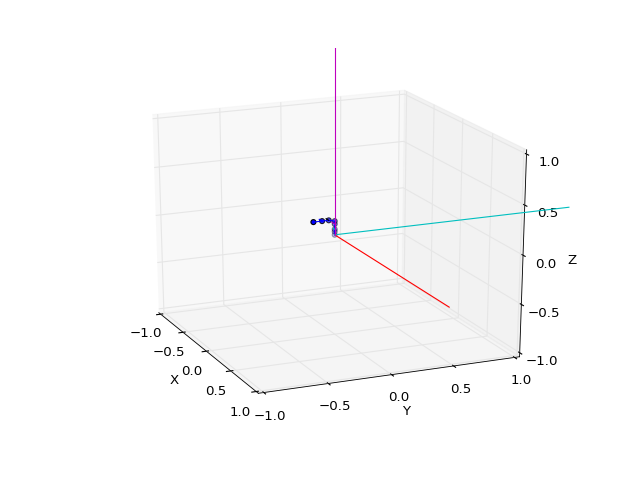

In [4]:
zero = [0] * 6

ax = matplotlib.pyplot.figure().add_subplot(111, projection='3d')
poppy.chain.plot(poppy.chain.convert_to_ik_angles(zero), ax)

# Inverse Kinematics

More than only accessing the position of the tip of the ErgoJr, you can use Inverse Kinematics to set this position.
Simply, you give a desired position in space, and you will get a motor configuration that will move the robot to the target!
![IK](ik.png)

The `goto` function just does this : 

In [ ]:
poppy.goto([-0.00670386, -0.17439168,  0.15083097])

In [5]:
from ipywidgets import interact, FloatSlider

poppy.reset_simulation()

c = poppy.chain

x, y, z = c.end_effector
size = 0.3

def goto(x, y, z):
    c.goto((x, y, z), .1)
    
interact(goto, 
         x=FloatSlider(min=x-size, max=x+size, value=x, step=0.01), 
         y=FloatSlider(min=y-size, max=y+size, value=y, step=0.01), 
         z=FloatSlider(min=z-size, max=z+size, value=z, step=0.01))